In [1]:
schema = '20221101-7d'

In [4]:
import json
import pathlib

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

from halo_infinite_analysis import db

In [6]:
ROOT = pathlib.Path('C:/Users/acurt/source/halo-infinite-analysis')
CONFIG = json.loads((ROOT / 'config.json').read_text())

In [25]:
sql = """
    SELECT *
    FROM "20221101-7d".vw_match
"""

with db.connect(**CONFIG['database']) as conn:
    df = pd.read_sql(sql, conn, index_col='id')

df['start_time'] = pd.to_datetime(df['start_time'], utc=True)
df['end_time'] = pd.to_datetime(df['end_time'], utc=True)

C:\Users\acurt\AppData\Local\Temp\ipykernel_16960\3724951342.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn, index_col='id')


In [26]:
df.head()

,match_id,start_time,end_time,duration,playable_duration,lifecycle_mode,game_variant_category,map_variant,game_variant,playlist,playlist_experience,map_mode_pair
id,,,,,,,,,,,,
19917,021b4dce-0abb-4a74-a28a-5e3dff0c90fb,2022-11-06 16:13:12.581000+00:00,2022-11-06 16:22:24.336000+00:00,525.59880,525.578,Matchmade,Bastion,Recharge,Arena:King of the Hill,Quick Play,Arena,Arena:King of the Hill on Recharge
19918,04658241-cacd-48c1-b776-306564e9bf72,2022-11-05 02:52:45.371000+00:00,2022-11-05 03:05:37.995000+00:00,750.00525,750.015,Matchmade,Fiesta,Launch Site,Fiesta:Slayer,Fiesta,Arena,Fiesta:Slayer on Launch Site
19919,79554840-14d6-4a0f-8484-3b17ae380a09,2022-11-07 04:01:09.754000+00:00,2022-11-07 04:11:04.240000+00:00,576.65906,576.640,Matchmade,Slayer,Recharge,Ranked:FFA Slayer,Ranked FFA,Arena,Ranked:FFA Slayer on Recharge
19920,40b09e15-c203-4a8c-b79b-b9f943926373,2022-11-06 03:32:56.743000+00:00,2022-11-06 03:42:08.980000+00:00,503.50192,503.485,Matchmade,Bastion,Streets,Arena:King of the Hill,Quick Play,Arena,Arena:King of the Hill on Streets
19921,69d0ccdb-f3c6-411c-b663-a4685b11abe8,2022-11-03 02:55:39.129000+00:00,2022-11-03 03:07:35.498000+00:00,673.56740,673.547,Matchmade,Slayer,Launch Site,Tactical:Slayer,Tactical Slayer,Arena,Tactical:Slayer on Launch Site


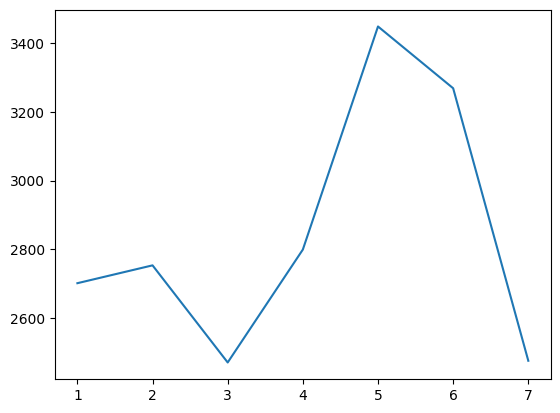

In [40]:
plt.plot(df['start_time'].dt.day.value_counts().sort_index())